In [1]:
from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    return

from peak_modeling import *
from radiation import obs_arrays, get_peaks_from_data
import matplotlib.pyplot as plt

model1 = peaks_model_R24
model2 = peaks_model_C25

In [2]:
def plot_output(T, model, ax, *args, **kwargs):
  nu, nF = model(T, *args)
  ax.loglog(nu, nF, **kwargs)

def create_legend_colors(ax, names, colors, **kwargs):
  dummy_col = [ax.plot([], [], c=col, ls='-')[0] for col in colors]
  legend = ax.legend(dummy_col, names, **kwargs)
  return legend

def create_legend_styles(ax, names, styles, **kwargs):
  dummy_lst = [ax.plot([], [], c='k', ls=l)[0] for l in styles]
  legend = ax.legend(dummy_lst, names, **kwargs)
  return legend

We test the various models for observed peak frequency and flux in the different models and compare them with data from our simulation

### Data:
observed peaks from fiducial run in spherical geometry

Text(0.5, 0, '$\\tilde{T}$')

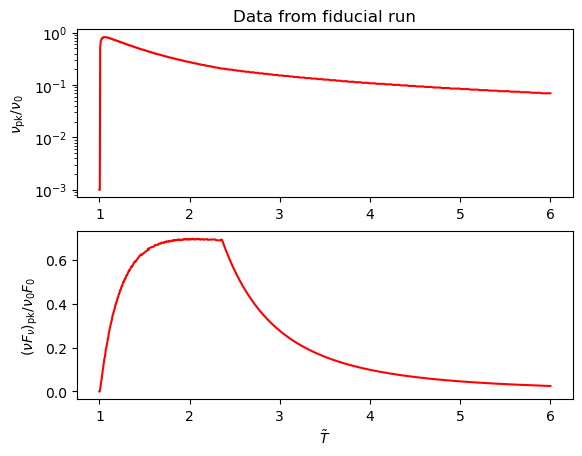

In [3]:
nu, T, env = obs_arrays('sph_fid', normed=True)
nu_pk, nF_pk = get_peaks_from_data('sph_fid', 'RS')
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_title('Data from fiducial run')
ax1.semilogy(T, nu_pk, c='r')
ax1.set_ylabel('$\\nu_{\\rm pk}/\\nu_0$')
ax2.plot(T, nF_pk, c='r')
ax2.set_ylabel('$(\\nu F_\\nu)_{\\rm pk}/\\nu_0F_0$')
ax2.set_xlabel('$\\tilde{T}$')

### Model1: Rahaman et al. 2024b
This model assumes constant Lorentz factor of the emitting region and constant energy dissipation in the shock

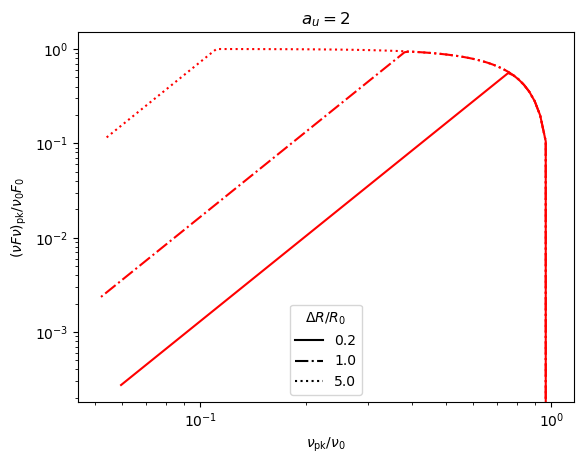

In [4]:
T = np.geomspace(1, 10, 100)
dRs = [0.2, 1, 5]
lstyles = ['-', '-.', ':']
fig, ax = plt.subplots()
ax.set_xlabel('$\\nu_{\\rm pk}/\\nu_0$')
ax.set_ylabel('$(\\nu F\\nu)_{\\rm pk}/\\nu_0F_0$')
ax.set_title('$a_u=2$')
legend = create_legend_styles(ax, [f'{dR:.1f}' for dR in dRs], lstyles,
    title='$\\Delta R/R_0$')

for dR, ls in zip(dRs, lstyles):
  plot_output(T, model1, ax, 2, dR, c='r', ls=ls)


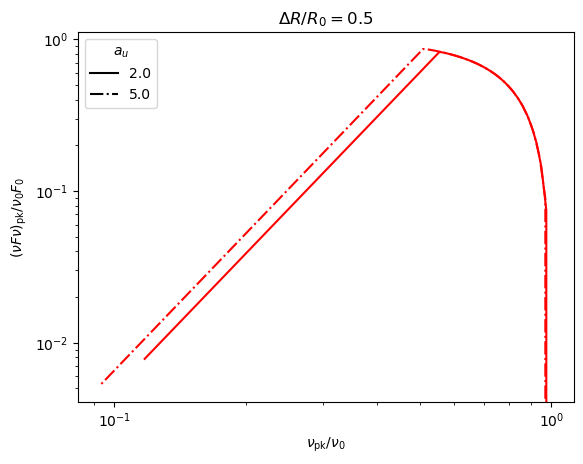

In [5]:
T = np.geomspace(1, 5, 100)
aus = [2, 5]
lstyles = ['-', '-.']
fig, ax = plt.subplots()
ax.set_xlabel('$\\nu_{\\rm pk}/\\nu_0$')
ax.set_ylabel('$(\\nu F\\nu)_{\\rm pk}/\\nu_0F_0$')
ax.set_title('$\Delta R/R_0=0.5$')
legend = create_legend_styles(ax, [f'{au:.1f}' for au in aus], lstyles,
    title='$a_u$')

for au, ls in zip(aus, lstyles):
  plot_output(T, model1, ax, au, 0.5, c='r', ls=ls)

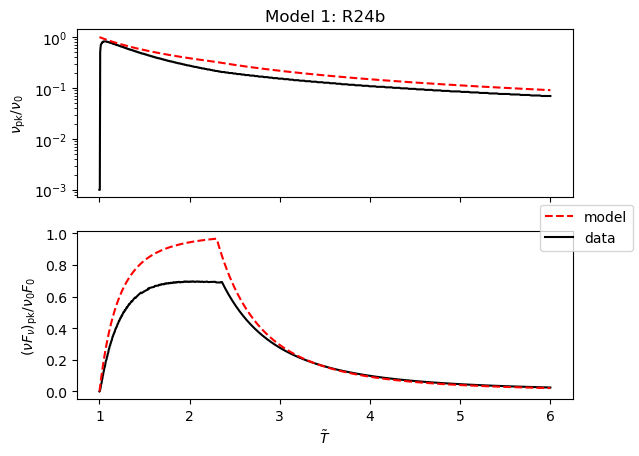

In [6]:
T = np.geomspace(1, 6, 450)
nu, nF = model1(T, 2, 1.3)
fig = plt.figure()
gs = fig.add_gridspec(2, 1, wspace=0)
ax1, ax2 = gs.subplots(sharex='all')
ax1.set_title('Model 1: R24b')
ax1.semilogy(T, nu_pk, c='k')
ax1.semilogy(T, nu, c='r', ls='--', label='model')
ax1.set_ylabel('$\\nu_{\\rm pk}/\\nu_0$')
ax2.plot(T, nF_pk, c='k', label='data')
ax2.plot(T, nF, c='r', ls='--')
ax2.set_ylabel('$(\\nu F_\\nu)_{\\rm pk}/\\nu_0F_0$')
ax2.set_xlabel('$\\tilde{T}$')
fig.legend(loc='center right')

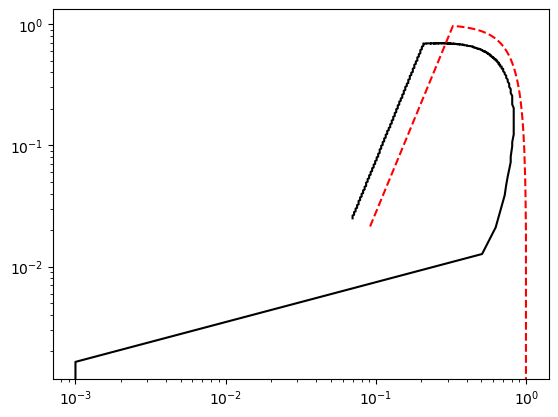

In [7]:
fig, ax = plt.subplots()
ax.loglog(nu_pk[nu_pk>0], nF_pk[nu_pk>0], c='k')
ax.loglog(nu, nF, c='r', ls='--')

### Model2: Generalization
This model adds variability of LF and dissipation rate: $\Gamma^2\propto R^{-m}$, $L'_{\rm bol}\propto R^{-n}$. For now, m and n are not constrained by the model, but they are being determined by simulations over a range of parameter space. 

Reference values:
$a_u=2$:, $m=-0.32$ and $n=0.89$
$a_u=5$:, $m=-0.76$ and $n=0.86$

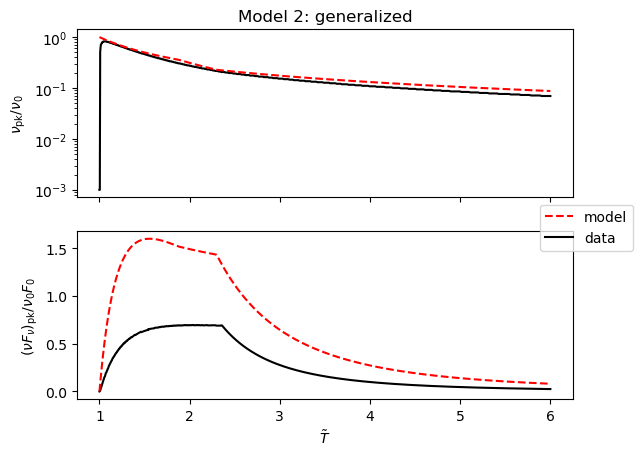

In [11]:
T = np.geomspace(1, 6, 450)
nu, nF = model2(T, 2, 1.3, -0.3, 0.5)
fig = plt.figure()
gs = fig.add_gridspec(2, 1, wspace=0)
ax1, ax2 = gs.subplots(sharex='all')
ax1.set_title('Model 2: generalized')
ax1.semilogy(T, nu_pk, c='k')
ax1.semilogy(T, nu, c='r', ls='--', label='model')
ax1.set_ylabel('$\\nu_{\\rm pk}/\\nu_0$')
ax2.plot(T, nF_pk, c='k', label='data')
ax2.plot(T, nF, c='r', ls='--')
ax2.set_ylabel('$(\\nu F_\\nu)_{\\rm pk}/\\nu_0F_0$')
ax2.set_xlabel('$\\tilde{T}$')
fig.legend(loc='center right')

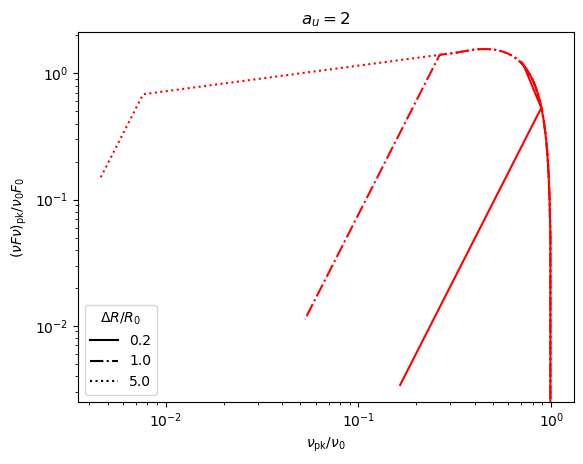

In [9]:
T = np.geomspace(1, 10, 500)
dRs = [0.2, 1, 5]
lstyles = ['-', '-.', ':']
fig, ax = plt.subplots()
ax.set_xlabel('$\\nu_{\\rm pk}/\\nu_0$')
ax.set_ylabel('$(\\nu F\\nu)_{\\rm pk}/\\nu_0F_0$')
ax.set_title('$a_u=2$')
legend = create_legend_styles(ax, [f'{dR:.1f}' for dR in dRs], lstyles,
    title='$\\Delta R/R_0$')

for dR, ls in zip(dRs, lstyles):
  plot_output(T, model2, ax, 2, dR, -0.32, 0.89, c='r', ls=ls)

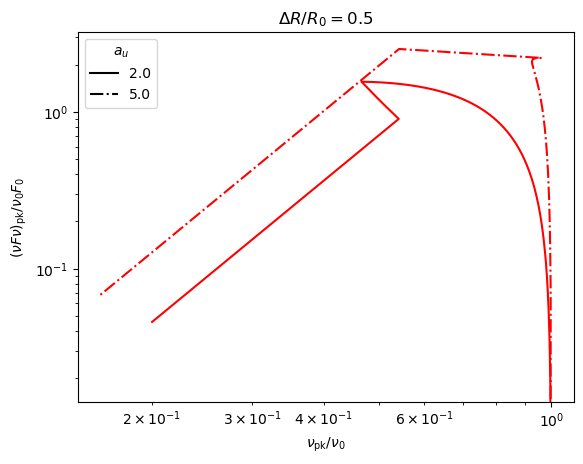

In [12]:
T = np.geomspace(1, 5, 1000)
aus, ms, ns = [2, 5], [-0.32, -0.76], [0.89, 0.86]
lstyles = ['-', '-.', ':']
fig, ax = plt.subplots()
ax.set_xlabel('$\\nu_{\\rm pk}/\\nu_0$')
ax.set_ylabel('$(\\nu F\\nu)_{\\rm pk}/\\nu_0F_0$')
ax.set_title('$\Delta R/R_0=0.5$')
legend = create_legend_styles(ax, [f'{au:.1f}' for au in aus], lstyles,
    title='$a_u$')

for au, m, n, ls in zip(aus, ms, ns, lstyles):
  plot_output(T, model2, ax, au, 0.5, m, n, c='r', ls=ls)